# 1. Introdcution


After looking at the contents of the titanic dataset, I thought it would be interesting to look at the following questions:

Three Hypothesis:

1- Determine if the survival rate is associated to the class of passenger

2- Determine if the survival rate is associated to the gender

3- Determine the survival rate is associated to the age


# 2. Setting-up the Environment

In [193]:
#importing of required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline
sns.set()

- Numpy : Multidimensional Array and Matrix Representation Library

- Pandas : Python Data Analysis Library for Data Frame, CSV File I/O

- Matplotlib : Data Visualization Library

- Seaborn : Data Visualization Library built on top of Matplotlib. This gives you a cleaner visualization and easier interface to call.

# 3. Read CSV into Dataframe

In [194]:
# Read csv into Pandas Dataframe and store in dataset variable
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv('test.csv')

## Important note on terminology:

- The target variable is the one you are trying to predict;
- Other variables are known as features (or predictor variables)

## Data definitions:

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:

Survived: Outcome of survival (0 = No; 1 = Yes)

Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)

Name: Name of passenger

Sex: Sex of the passenger

Age: Age of the passenger (Some entries contain NaN)

SibSp: Number of siblings and spouses of the passenger aboard

Parch: Number of parents and children of the passenger aboard

Ticket: Ticket number of the passenger

Fare: Fare paid by the passenger

Cabin Cabin number of the passenger (Some entries contain NaN)

Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the Survived feature from this dataset and store it as its own separate variable outcomes. We will use these outcomes as our prediction targets.
Run the code cell below to remove Survived as a feature of the dataset and store it in outcomes.

# 4. Data Wrangling

We will start by viewing the very first few rows inside the data. This is to take a sneak peek at the data and make sure you extract the data properly.

In [195]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [196]:
df_train.shape

(891, 12)

 First, it lets us know we have 891 observations, or passengers, to analyze here:

The info helps you figure out the data types and the existence of empty values. Here, we found out that the columns Age, Cabin, and Embarked possess missing value.

In [197]:
# print out information about the dataWe will start by viewing the very first few rows inside the data. This is to take a sneak peek at the data and make sure you extract the data properly.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


After printing out the dataset information above, we can see that the Age, Cabin and Embarked columns are missing entries. 

 From this initial observation we notice that, from 891 passenger records: - 714 have valid ages; - only 204 have cabin records; - 2 embarkments are missing.
The rows with missing ages and embarkment values will be dropped whenever an analysis depends on them.
The cabin values are not going to be used in this analysis, so they will not be touched.


Age, Cabin, and Embarked are missing values. Cabin has too many missing values, whereas we might be able to infer values for Age and Embarked.

## Most people use two methods to solve the problem: 

1. Delete all the rows that contain missing values, which means losing a lot of valuable information.

2. Use statistic method to fill those missing values.

From this description, we can find the following thoughts:
The mean and the distribution of the variables.
Most passengers bought the tickets for relatively lower price. But, a few bought at high cost — indicating possible VIPs.
The Parch distribution is highly skewed as the quartiles indicate 0 and the max indicates 6. This means that most people do not bring parents or children on board and a few parents bring up to 6 children and parents on board.

Use the DataFrame .describe() method to check out summary statistics of numeric columns (of df_train). The describe will help you get all the statistical description of numerical columns. If you write the include parameter as object, it would describe the non-numerical columns. This is very useful method to grab a quick understanding on the data statistically.

In [198]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [199]:
# check missing values in train dataset
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [200]:
titanic_df_clean = df_train.dropna(subset=['Age'])


In [201]:

# PClass map
pclass_map = {1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'}
df_train['Pclass'] = df_train['Pclass'].map(pclass_map)

### Challenge 1: How to handle missing values for this dataset?


# 5. Data Visualization

### Using Matplotlib 

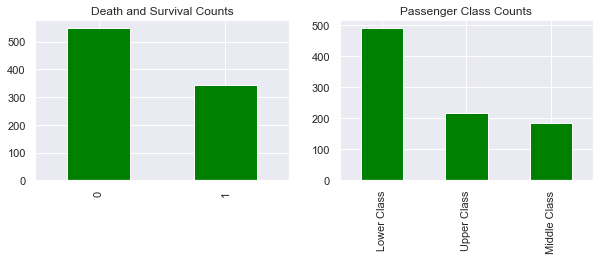

In [202]:
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(6, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
df_train['Survived'].value_counts().plot(kind='bar', 
                                         title='Death and Survival Counts', color='green')

# Plot Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
df_train['Pclass'].value_counts().plot(kind='bar', 
                                       title='Passenger Class Counts', color='green')



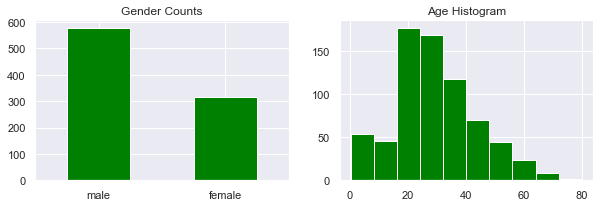

In [204]:
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(6, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
df_train['Sex'].value_counts().plot(kind='bar', 
                                    title='Gender Counts', color='green')
plt.xticks(rotation=0)


# Plot the Age histogram
plt.subplot2grid(fig_dims, (1, 1))
df_train['Age'].hist(color='green')
plt.title('Age Histogram')

plt.savefig('filename.png', dpi=200)

### Using Seaborn 

use seaborn to build a bar plot of Titanic survival (your target variable).

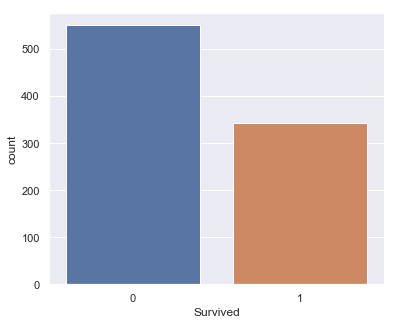

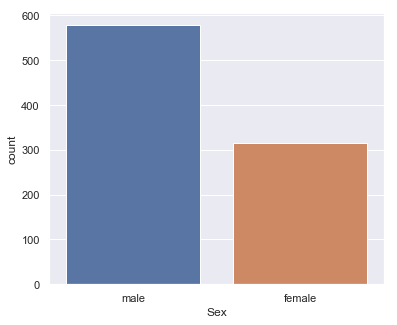

In [205]:
# sns.countplot(x='Sex', data=df_train)
sns.countplot(x='Survived', data=df_train)
plt.show()

# sns.countplot(x='Sex', data=df_train)
sns.countplot(x='Sex', data=df_train)
plt.show()

Take-away: Women were more likely to survive than men.

Use pandas to figure out the proportion of women that survived, along with the proportion of men:

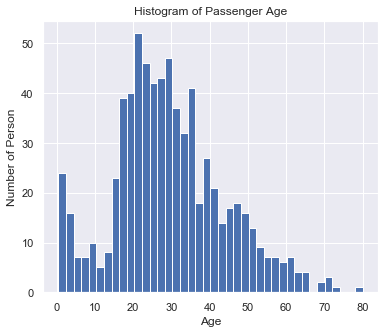

In [206]:
df_train.Age.hist(bins=40)
plt.xlabel("Age")
plt.ylabel("Number of Person")
plt.title("Histogram of Passenger Age");

I choose histogram since I only analyze one numerical variable. I choose 40 as nunmber of bins to let the histogram show smooth distribution of the data. And since we see from the statistics that the age is max at 80 years old, every 20 year will have the exact edge of the histogram.
I can see from this histogram that many children is below 5 years old. Some of them are babies which we see that there's a peak around 1 year. This histogram will have an almost normal distribution if there isn't a peak around 1 year old. The earlier statistics show that median is 28 year old, and mean is 29 year old. You can also tell that the distribution is normal when you have similar median and mean.

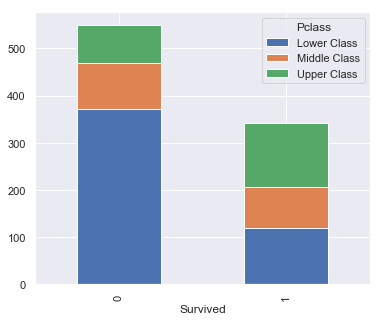

In [207]:
pd.crosstab(df_train['Survived'], df_train['Pclass']).plot(kind='bar', stacked=True)

We can see that passenger class seems to have a significant impact on whether a passenger survived. Those in First Class the highest chance for survival.


Gender might have also played a role in determining a passenger's survival rate. We'll need to map Sex from a string to a number to prepare it for machine learning algorithms.

Generate a mapping of Sex from a string to a number representation:

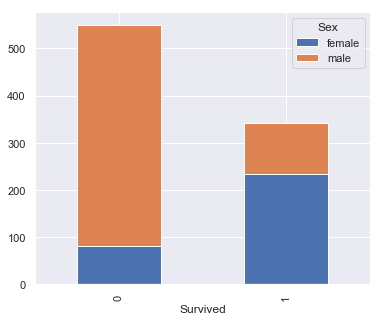

In [208]:
pd.crosstab(df_train['Survived'], df_train['Sex']).plot(kind='bar', stacked=True)

The majority of females survived, whereas the majority of males did not.

The Age column seems like an important feature--unfortunately it is missing many values. 

In [209]:

df_train[df_train['Age'].isnull()][['Sex', 'Pclass', 'Age']].head()

,Sex,Pclass,Age
5,male,Lower Class,NaN
17,male,Middle Class,NaN
19,female,Lower Class,NaN
26,male,Lower Class,NaN
28,female,Lower Class,NaN



Determine the Age typical for each passenger class by Sex_Val. We'll use the median instead of the mean because the Age histogram seems to be right skewed.

In [210]:
 freqtab = pd.crosstab(df_train['Survived'], df_train['Sex'])

In [211]:
 freqtab

Sex,female,male
Survived,,
0,81,468
1,233,109


In [212]:
import scipy.stats as sp

In [213]:
from scipy import stats as sp
chi2,pval,dof,expected = sp.chi2_contingency(freqtab)
print("ChiSquare test statistic: ",chi2)

ChiSquare test statistic:  260.71702016732104


In [214]:
print("p-value: ",pval)

p-value:  1.1973570627755645e-58


Since both independent and dependent variable are categorical, I choose Chi-Square Independece test. For this test to be true, Let's validate the condition,
Each cell has at least 5 expected cases. Checked.
Each case only contributes to once cell in the table. Checked.
If sample, random sample and less than 10% population. This dataset is already a population.

In [215]:
freqtab = pd.crosstab(df_train['Survived'], df_train['Pclass'])
chi2,pval,dof,expected = sp.chi2_contingency(freqtab)
print("ChiSquare test statistic: ",chi2)

ChiSquare test statistic:  102.88898875696057


In [216]:
print("p-value: ",pval)


p-value:  4.5492517112987287e-23


Since we already validated our dataset earlier (also from the frequency table, we can see that each cell has at least 5 expected cases), we can directly perform the statistical test.

So indeed, the test statistic result really high and again p-value is practically zero. The data provide convincing evidence that economic status and whether they survived are related.

In [217]:
# http://napitupulu-jon.appspot.com/posts/titanic.html

# 5. Data Analysis

In [218]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## 5.1 Determine if the survival rate is associated to the gender


In [219]:
gender_table = pd.crosstab(df_train['Survived'],df_train['Sex'])
print(gender_table)

Sex       female  male
Survived              
0             81   468
1            233   109


### Proportion of survivors by Gender


In [220]:
print (df_train.groupby('Sex').Survived.mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [221]:
gender_table

Sex,female,male
Survived,,
0,81,468
1,233,109


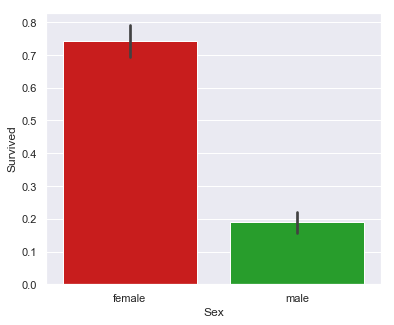

In [288]:
x = ['red','green']
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.barplot(x='Sex', y='Survived', data=df_train, palette=sns.xkcd_palette(x), order = ['female', 'male'])

Text(0.5, 0, 'Survived')

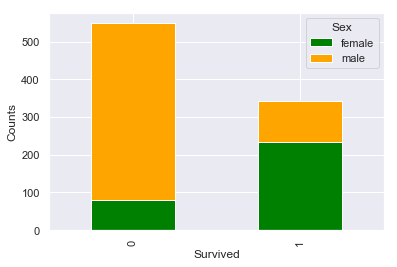

In [222]:
gender_table.plot(kind="bar", stacked=True,  figsize=(6,4), color=('green', 'orange'))
plt.title("")
plt.ylabel('Counts')
plt.xlabel('Survived')

### 
The plots and proportions above show that there were a significant more males on board the Titanic compared to the number of females. Whilst the second plot (% of survivors by gender) shows that Females had a higher proportion (74.2%) of survivors compared to the proportion of males (18.9%). This shows that females had a greater rate of survival.

### Statistics Test

In [225]:
 freqtab = pd.crosstab(df_train['Survived'], df_train['Sex'])

In [226]:
from scipy import stats as sp
chi2,pval,dof,expected = sp.chi2_contingency(freqtab)
print("ChiSquare test statistic: ",chi2)

ChiSquare test statistic:  260.71702016732104


In [233]:
# test
gender_table = pd.crosstab(df_train['Survived'], df_train['Sex'])
chi2, p, dof, expected = sp.chi2_contingency(gender_table)
print('p value:', p)

p value: 1.1973570627755645e-58


In [234]:
print("ChiSquare test statistic: ",chi2)

ChiSquare test statistic:  260.71702016732104


As the P-Value is less than 0.05 the probability of that the gender will impact the chances of survival is high. Therefore I believe that we can reject the null hypothesis. I also believe that the plots above confirm this result.

## 5.2 Determine if the survival rate is associated to the class of passenger

In [235]:
table_class = pd.crosstab(df_train['Survived'],df_train['Pclass'])
print (table_class)

Pclass    Lower Class  Middle Class  Upper Class
Survived                                        
0                 372            97           80
1                 119            87          136


### Proportion of survivors by class

In [236]:
print (df_train.groupby('Pclass').Survived.mean())

Pclass
Lower Class     0.242363
Middle Class    0.472826
Upper Class     0.629630
Name: Survived, dtype: float64


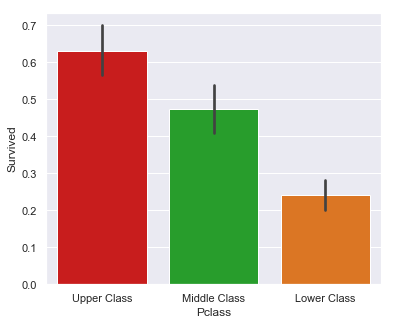

In [284]:
x = ['red','green','orange']
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.barplot(x='Pclass', y='Survived', data=df_train, palette=sns.xkcd_palette(x), order = ['Upper Class', 'Middle Class', 'Lower Class'])

Text(0.5, 0, 'Survived')

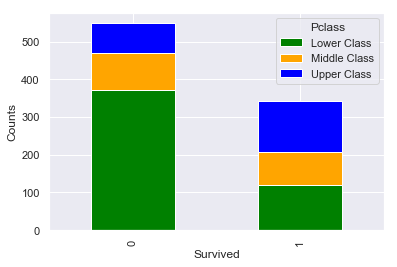

In [237]:

table_class.plot(kind="bar", stacked = True, figsize=(6,4), color=('green', 'orange', 'blue'))
plt.title("")
plt.ylabel('Counts')
plt.xlabel('Survived')

The graphs above so that whilst the lower class had more passengers, than all classes, and more survivors than the middle class, the lower class had the lowest survival rate. The Upper Class passengers had the highest survival rate

### Hypothesis Test

In [242]:

table = pd.crosstab([df_train['Survived']], df_train['Pclass'])
chi2, p, dof, expected = sp.chi2_contingency(table.values)
results = [
    ['Item','Value'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
results

[['Item', 'Value'],
 ['Chi-Square Test', 102.88898875696057],
 ['P-Value', 4.5492517112987287e-23]]

As the P-Value is less than 0.05 the probability of that the social class will impact the chances of survival is high. Therefore I believe that we can reject the null hypothesis. I also believe that the plots above confirm this result.

# 5.3 Determine the survival rate is associated to the age



The hypothesis for this question is that the age group does impact the chances of survival

H0 = Age Group has no impact on survivability

HA = Age Group does impact the chances of survivabily

### Distriution of Age group

We also are going to need a column stating if a passenger is a child or an adult. 15 is going to be the childhood age threshold for our study.

In [245]:
df_train_removed_null = df_train.dropna(subset=['Age'])

In [258]:
group_names = ['Child','Adults']
bins = [0,15,80]
df_train_removed_null['Age_Group'] = pd.cut(df_train_removed_null['Age'], bins=bins, labels=group_names)

C:\Users\NASTABA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [295]:
pd.crosstab(df_train_removed_null['Survived'],df_train_removed_null['Age_Group'])

Age_Group,Child,Adults
Survived,,
0,34,390
1,49,241


In [293]:
print (df_train_removed_null.groupby('Age_Group').Survived.mean())

Age_Group
Child     0.590361
Adults    0.381933
Name: Survived, dtype: float64


In [262]:
age_table = pd.crosstab(df_train_removed_null['Age_Group'],df_train_removed_null['Survived'])
print (age_table)

Survived     0    1
Age_Group          
Child       34   49
Adults     390  241


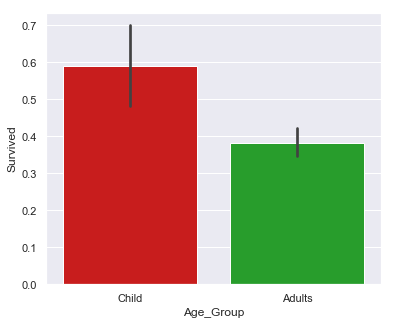

In [296]:
x = ['red','green']
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.barplot(x='Age_Group', y='Survived', data=df_train_removed_null, palette=sns.xkcd_palette(x), order = ['Child', 'Adults'])

Text(0.5, 0, 'Survived')

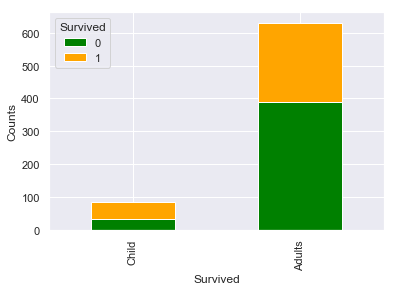

In [263]:
age_table.plot(kind="bar", stacked = True, figsize=(6,4), color = ('green', 'orange'))

plt.title("")
plt.ylabel('Counts')
plt.xlabel('Survived')


In [252]:
age_table = pd.crosstab([df_train['Survived']], df_train['Age_Group'])
chi2, p, dof, expected = sp.chi2_contingency(age_table.values)
results = [
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
print(results)

[['Chi-Square Test', 12.36153735048831], ['P-Value', 0.00043826965228709475]]


In [183]:
# http://luizschiller.com/titanic/

Use seaborn to build bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Pclass'.

C:\Users\NASTABA\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


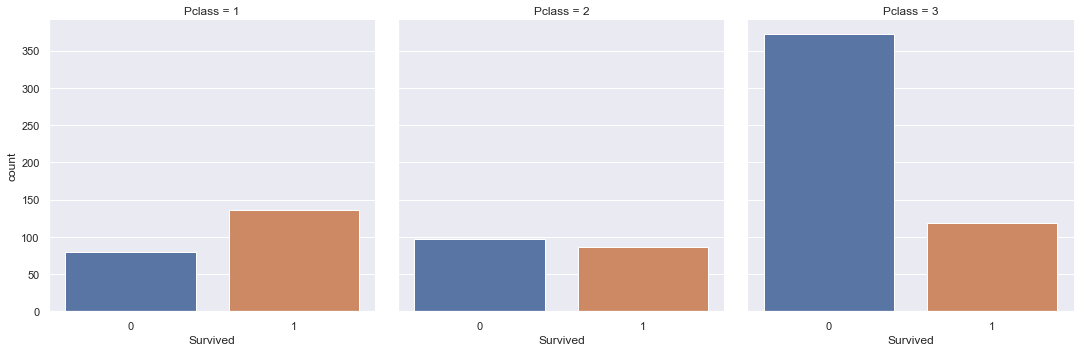

In [19]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data=df_train);

Take-away: Passengers that travelled in first class were more likely to survive. On the other hand, passengers travelling in third class were more unlikely to survive.

EDA with Numeric Variables

Use seaborn to plot a histogram of the 'Age' column of df_train. You'll need to drop null values before doing so.

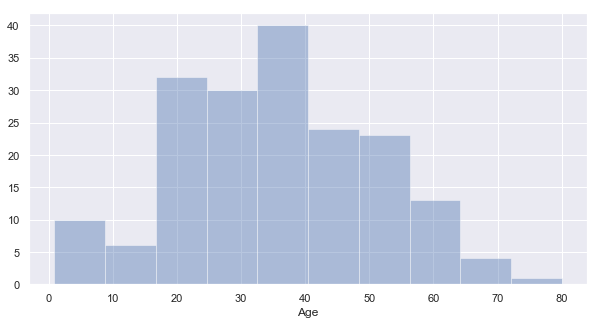

In [21]:
df_train_drop = df_train.dropna()
sns.distplot(df_train_drop.Age, kde=False);

# 6. Conclusion